In [ ]:
"""
@의사 결정 트리 
-엔트로피,지니계수를 이용해서 어떤질문이 가장 좋을지 알아낼수 있고 좋은질문 찾는것이 중요
-어떤 항목에 대한 관측값(입력결과)과 목표값(분류결과)을 연결시켜주는 예측 모델로써 결정 트리를 사용하는 머신러닝 방법 
-의사결정 트리 만들때 좋은질문 찾는것이 중요
-데이터가 반반씩 섞여있을경우 복잡도가 가장 높다= 엔트로피가 가장 높다고 함(복잡도를 최대한 낮춰야함-복잡할수록 1에 가까움)
-한쪽에 한클래스만 있으면 복잡도 0
-질문을 던진 이전에 복잡도 1, 질문 던진 이후엔 복잡도 0 이되면 좋음
-한번의 질문으로 복잡도 0이 나오면 베스트
-영향력이 가장 큰 변수를 상위 노드로 ,영향력이 작은 변수를 하위노드로 선택
@엔트로피(불확실성을 수치적으로 표현한값)
-약간의 정보를 획득하는 과정은 정잡에 대한 불확실성이 줄어든다는것
-정보이득(information gain): 질문 전의 엔트로피에서 질문 후의 엔트로피를 뺀값 -> 불확실성이 줄어든 정도
@지니계수 : 얼마나 많은 데이터들이 섞여있는지를 나타내는 불확실성 의미
-지니계수가 0.5일때 최대로서 데이터가 반반씩 섞여있는 경우

overfitting : 트레인 데이터에대한 분류 정확도는 매우높게 나옴 but 일반화가 잘 안되어 있어 테스트 데이터에 대해 문제가 생길수 있다
모델 만들시 트레인 데이터에대해 너무 과하게 학습하지 않도록 설계하는것이 좋음
-- 더이상 질문할게 없는 상태 별로 안좋음 -> 가지치기 : 적정한 시점에 가지치기를 생성해 더이상 질문이 생기지 않도록 함

의사결정 트리 알고리즘 단점 : 오버피팅 문제가 항상 따라 다닌다
"""

In [47]:
from sklearn import datasets 
import pandas as pd 


In [48]:
iris=datasets.load_iris()

In [49]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [50]:
labels=pd.DataFrame(iris.target)      #정답
data=pd.DataFrame(iris.data)          #수치값
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
labels.columns=['labels']

In [52]:
data.columns=['Sepal length','Sepal width','Petal length','Petal width']

In [53]:
labels
data
data=pd.concat([data,labels],axis=1)
data
data.corr()

,Sepal length,Sepal width,Petal length,Petal width,labels
Sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
labels,0.782561,-0.426658,0.949035,0.956547,1.000000


In [24]:

feature=data[['Sepal length','Sepal width']]
feature

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
model=KMeans(n_clusters=3)  #cluster을 몇개로 할것인지 사전에 정한다.시각화를 함으로 cluster 갯수 정할수 있음

In [43]:
model.fit(feature)  #feature 안에 담긴 데이터를 가지고 모델에 반영

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [44]:
#각각의 데이터가 어디에 속하는가 예측
pred=pd.DataFrame(model.predict(feature))
pred.columns=['predict']
pred

,predict
0,0
1,0
2,0
3,0
4,0
...,...
145,1
146,2
147,1
148,1


In [45]:
res=pd.concat([feature,pred],axis=1)
res

,Sepal length,Sepal width,predict
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


In [32]:
data

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [54]:
model.cluster_centers_  #k개 만큼 중심점의 좌표

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [63]:
centers=pd.DataFrame(model. cluster_centers_,columns=['Sepal length','Sepal width'])

In [64]:
centers

,Sepal length,Sepal width
0,5.006000,3.428000
1,6.812766,3.074468
2,5.773585,2.692453


In [65]:
c_x=centers['Sepal length']
c_y=centers['Sepal width']

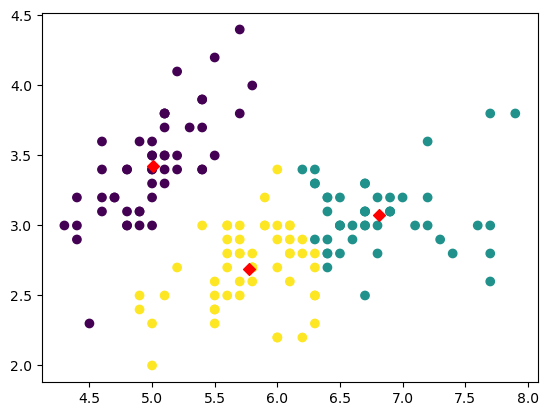

In [69]:
plt.scatter(res['Sepal length'],res['Sepal width'],c=res['predict'])
plt.scatter(c_x, c_y, c='r', marker='D')

In [77]:
pd.crosstab(data['labels'],res['predict'])  #labels가 정답 predict가 예측값

predict,0,1,2
labels,,,
0,50,0,0
1,0,12,38
2,0,35,15


In [79]:
print(123/150)

0.82


In [80]:
########SNS 데이터를 바탕으로 학생 클러스터 생성###########

In [125]:
data=pd.read_csv("snsdata.csv")
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [127]:
data.describe()  # 기술통계는 수치 데이터에 대해서만 가능, 문자형태는 불가능

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [128]:
data.describe(include='object')    #object에대해서도 기술통계가 보고싶을경우 

,gender
count,27276
unique,2
top,F
freq,22054


In [129]:
data.isnull().sum()     #열 단위 결측값 갯수 확인

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [130]:
data['gender'].value_counts(dropna=False)  # 결측값도 출력

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

In [131]:
data['gender'].fillna('not disclosed',inplace=True)   #원래 문자형태여서 문자로 들어감

In [132]:
data.isnull().sum()

gradyear           0
gender             0
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [133]:
data['gender'].value_counts()

F                22054
M                 5222
not disclosed     2724
Name: gender, dtype: int64

In [134]:
data['age'].isnull().sum()  #5086개 결측값

#졸업연도별 나이의 평균을 구하시오.
data.groupby('gradyear').age.mean()
#data.groupby('gradyear').get_group(2006).age.mean()
#data.groupby('gradyear').get_group(2007).age.mean()
#data.groupby('gradyear').get_group(2008).age.mean()
#data.groupby('gradyear').get_group(2009).age.mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [102]:
#age 열이 결측값인 데이터에 대해, 동일한 gradyear 값에 대한 그룹별 age의 평균값으로 결측값을 대체

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
#data.age=data.groupby('gradyear').get_group(2006)['age'].fillna(data.groupby('gradyear').get_group(2006).age.mean())
#data.age=data.groupby('gradyear').get_group(2007)['age'].fillna(data.groupby('gradyear').get_group(2007).age.mean())
#data.age=data.groupby('gradyear').get_group(2008)['age'].fillna(data.groupby('gradyear').get_group(2008).age.mean())
#data.age=data.groupby('gradyear').get_group(2009)['age'].fillna(data.groupby('gradyear').get_group(2009).age.mean())
#data.isnull().sum()

In [135]:
data.groupby('gradyear')

data['age']=data.groupby('gradyear')['age'].transform(lambda x : x.fillna(x.mean()))

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        30000 non-null  object 
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [139]:
data[data['age']>100]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
70,2006,not disclosed,106.686,24,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
573,2006,F,106.261,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710,2006,M,105.840,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736,2006,not disclosed,106.864,28,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
796,2006,M,106.927,47,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28936,2009,M,105.971,47,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29677,2009,F,106.801,67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29809,2009,F,106.130,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29922,2009,F,106.864,44,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

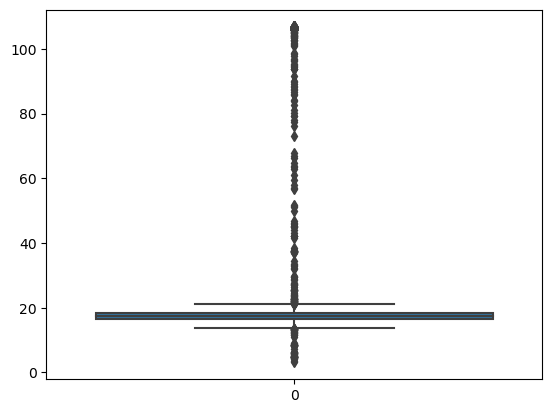

In [143]:
sns.boxplot(data['age'])   #이상치 확인

In [146]:
q1=data['age'].quantile(0.25)  #16.504   #각 사분위수에 해당하는 값 뽑아낸다
q3=data['age'].quantile(0.75)  #18.391

In [147]:
iqr=q3-q1

In [148]:
iqr

1.8874592240696728

In [153]:
q1-1.5*iqr   #13.672  이값보다 작으면 outlier로 간주
q3+1.5*iqr   #21.222  이값보다 크면 outlier로 간주

df=data[(data['age']>(q1-1.5*iqr)) & (data['age']<(q3+1.5*iqr))]  #정상범위 값들만
#29633 rows 나머지는 outlier

In [155]:
df.shape  #outlier 제외한 정상 범위의 데이터만 추출하여 데이터프레임 구성

(29633, 40)

In [156]:
df['age'].describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

<Axes: >

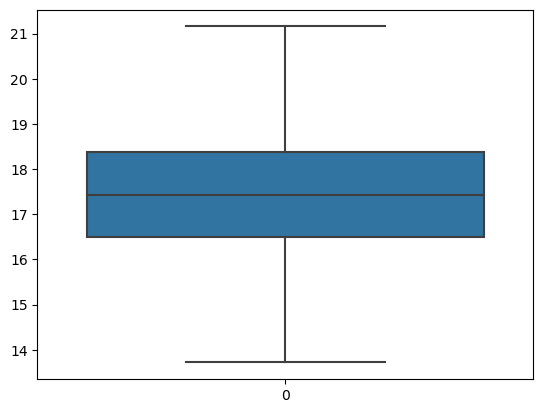

In [158]:
sns.boxplot(df['age'])   #이상치 없음 확인

In [ ]:
#ex)   표준화를 한뒤 평균 언급 횟수는 0이다
#basketball=10 -> 표준화 -> -1 => 평균보다 적게 언급
#football = 3 -> 표준화 -> 2(평균보다 양의 방향으로 2만큼 더 ) => 평균보다 많이 언급
#표준화를 해야 비교가능

In [205]:
#필요한 열이름들 추출
names=df.columns[4:]  
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [247]:
#사본 만듬
scaled_feature=data.copy()
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
#names 해당하는 열만 뽑아냄
features=scaled_feature[names]
features

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
#fit함수에 적용하기 위해 array로 변환
features.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [250]:
from sklearn.preprocessing import StandardScaler

In [251]:
scaler=StandardScaler().fit(features.values)

In [252]:
features=scaler.transform(features.values) #  표준화 변환

In [253]:
features.shape

(30000, 36)

In [254]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [255]:
scaled_feature[names]=features  #features : 표준화된 자료들이고 사본에다가 넣어준다

In [256]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,2009,M,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,2009,M,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,2009,M,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


In [257]:
scaled_feature.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2007.500000,17.982148,30.179467,5.494864e-17,-4.547474e-17,1.515825e-17,3.031649e-17,3.789561e-18,1.894781e-17,-3.789561e-17,...,-8.289665e-18,-1.136868e-17,5.873820e-17,1.515825e-17,5.494864e-17,1.136868e-17,-9.687066e-17,-1.610564e-17,-1.515825e-17,1.752672e-17
std,1.118053,7.169862,36.530877,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,2006.000000,3.086000,0.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,2006.750000,16.504000,3.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,2007.500000,17.443000,20.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,2008.250000,18.391459,44.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2009.000000,106.927000,830.000000,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,1.729137e+01,...,1.683073e+02,1.687776e+01,1.469812e+01,1.661229e+01,2.575205e+01,2.843431e+01,3.493308e+01,3.179061e+01,1.982379e+01,4.613268e+01


In [258]:
# gender을 숫자 형태로 인코딩 해줘야함
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,2009,M,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,2009,M,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,2009,M,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


In [259]:
def gen_to_num(x):
    if x == 'M':
        return 1 
    if x == 'F':
        return 2
    if x == 'not disclosed':
        return 3 

In [260]:
scaled_feature['gender']=scaled_feature['gender'].apply(gen_to_num)

In [261]:
scaled_feature['gender']

0        1
1        2
2        1
3        2
4        3
        ..
29995    1
29996    1
29997    1
29998    1
29999    2
Name: gender, Length: 30000, dtype: int64

In [263]:
scaled_feature[names]=features

In [264]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,2,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,2,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,3,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,1,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,2009,1,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,2009,1,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,2009,1,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


In [265]:
scaled_feature.describe()     # 어떤 그룹에서 

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2007.500000,1.916733,17.982148,30.179467,5.494864e-17,-4.547474e-17,1.515825e-17,3.031649e-17,3.789561e-18,1.894781e-17,...,-8.289665e-18,-1.136868e-17,5.873820e-17,1.515825e-17,5.494864e-17,1.136868e-17,-9.687066e-17,-1.610564e-17,-1.515825e-17,1.752672e-17
std,1.118053,0.507880,7.169862,36.530877,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,2006.000000,1.000000,3.086000,0.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,2006.750000,2.000000,16.504000,3.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,2007.500000,2.000000,17.443000,20.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,2008.250000,2.000000,18.391459,44.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2009.000000,3.000000,106.927000,830.000000,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,...,1.683073e+02,1.687776e+01,1.469812e+01,1.661229e+01,2.575205e+01,2.843431e+01,3.493308e+01,3.179061e+01,1.982379e+01,4.613268e+01


In [266]:
model=KMeans(n_clusters=5,random_state=42)  #random_state를 이용하여 실행할때마다 값이 변하는것 방지

In [267]:
mymodel=model.fit(scaled_feature)  #kmeans 모델 만든것

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [268]:
mymodel.labels_  # 각 데이터들이 어떠한 카테고리에 속하는지 나옴

array([0, 0, 1, ..., 0, 0, 0])

In [223]:
mymodel

KMeans(n_clusters=3, random_state=0)

In [269]:
mymodel.cluster_centers_    # 각 array는 중심점의 좌표값을 나타낸거다,basketball부터 봐야함으로 각 array의 5번째부터

array([[ 2.00743788e+03,  1.91033673e+00,  1.80783944e+01,
         6.14571913e+00, -5.25998612e-02, -3.12937775e-02,
        -3.19932940e-02, -5.40118741e-02, -5.08218551e-02,
        -3.56649254e-02, -3.89582024e-02, -2.52662335e-02,
        -1.21558612e-02, -2.74078123e-02, -6.03110292e-02,
        -2.08207550e-03, -2.23308047e-02, -3.80015075e-02,
        -1.63276611e-02, -4.86250133e-02, -2.34525607e-02,
        -1.70832472e-02, -4.15590927e-02, -2.95176052e-02,
        -3.77616327e-02, -5.24165207e-02, -2.97633681e-02,
        -9.53848037e-03, -2.51064527e-02, -3.47686188e-02,
        -9.64447646e-03, -5.22328961e-02, -7.52561799e-02,
        -2.86656171e-02, -4.24611416e-02, -3.97022654e-02,
        -8.37503068e-03, -3.02556646e-02, -9.97389730e-03,
         1.03725933e-02],
       [ 2.00762347e+03,  1.95241395e+00,  1.78884190e+01,
         7.04668515e+01,  7.94351337e-02,  4.70922626e-02,
         5.30506436e-02,  1.01858593e-01,  5.71699049e-02,
         3.98489135e-02,  6.61

In [270]:
data['cluster']=mymodel.labels_

In [275]:
data.head()
data.groupby(['cluster']).groups
data.groupby(['cluster']).count()['age']

cluster
0    15324
1     4329
2     1239
3     8955
4      153
Name: age, dtype: int64

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

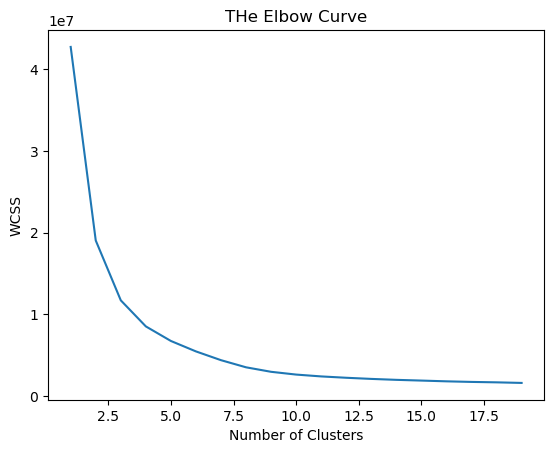

In [276]:
#elbow curve : 그래프상 떨어지다가 완만해지는 지점이 좋다 판단.( 해당 그래프에서는 7정도로 생각)
wcss = []  #with in cluster sum of square 
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0)  #클러스터 수를 늘려가며 비교한다
    kmeans.fit(scaled_feature)                                                   #max_iter=300=중심점의 좌표가 변하지 않을때까지 돌아가는데 
    wcss.append(kmeans.inertia_)                                                 #300번 돌아갈때까지 중심점 좌표 고정 안되면 정지한다
    
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()

In [291]:
kmeans = KMeans(n_clusters=9,random_state=41)
kmeans.fit(scaled_feature)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=9, random_state=41)

In [292]:
kmeans.labels_

array([6, 6, 0, ..., 6, 6, 6])

In [293]:
data['cluster'] = kmeans.labels_

In [294]:
import numpy as np

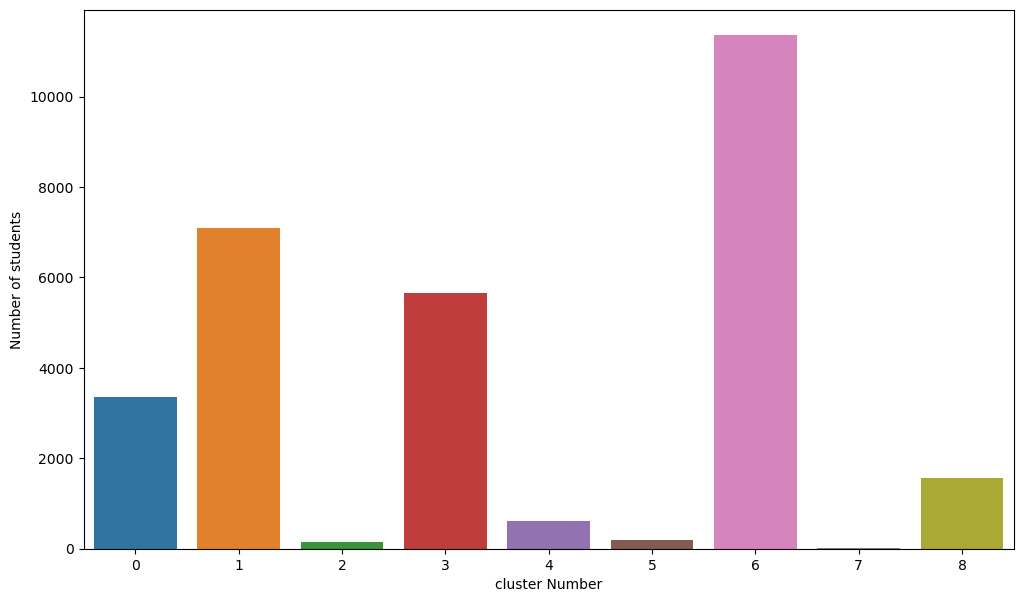

In [295]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,9,1), y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

In [296]:
data.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]

C:\Users\user\AppData\Local\Temp\ipykernel_11760\375450235.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]


,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.334225,0.283081,0.267916,0.232530,0.177520,0.159679,0.133214,0.130241,0.095450,0.154921,...,0.115671,0.315195,0.448409,0.176033,0.098424,0.081772,0.172465,0.122212,0.093369,0.060065
1,0.262921,0.260104,0.224898,0.152373,0.146881,0.141952,0.112660,0.108717,0.094071,0.142374,...,0.088861,0.252500,0.344036,0.148852,0.059147,0.046472,0.185608,0.122659,0.087452,0.059851
2,0.321678,0.293706,0.293706,0.209790,0.181818,0.237762,0.104895,0.139860,0.104895,0.139860,...,0.118881,0.307692,0.503497,0.223776,0.125874,0.153846,0.216783,0.139860,0.139860,0.062937
3,0.300088,0.281167,0.251105,0.189744,0.177719,0.154023,0.104156,0.108576,0.089832,0.158798,...,0.139876,0.273386,0.391866,0.157737,0.080990,0.052166,0.205659,0.127498,0.090009,0.056764
4,0.423453,0.309446,0.223127,0.312704,0.265472,0.153094,0.201954,0.109121,0.130293,0.136808,...,0.128664,0.452769,0.517915,0.182410,0.144951,0.104235,0.201954,0.130293,0.112378,0.053746
5,0.181818,0.151515,0.212121,0.080808,0.106061,0.151515,0.035354,0.060606,0.121212,0.075758,...,0.065657,0.202020,0.171717,0.070707,0.055556,0.030303,0.242424,0.121212,0.080808,0.050505
6,0.217594,0.217418,0.185717,0.114037,0.102589,0.108929,0.080926,0.088940,0.078373,0.125396,...,0.077492,0.209757,0.288130,0.133410,0.053452,0.038042,0.172596,0.096073,0.082600,0.064635
7,0.285714,0.000000,0.000000,0.142857,0.857143,0.000000,1.285714,0.285714,0.000000,0.142857,...,0.285714,0.000000,1.000000,0.000000,0.142857,0.142857,0.285714,0.285714,0.142857,0.000000
8,0.330774,0.287268,0.278311,0.233525,0.171465,0.141395,0.184261,0.136276,0.072937,0.143954,...,0.106206,0.369802,0.460653,0.154191,0.103007,0.070377,0.190019,0.132438,0.096609,0.050544
